# Feature extraction and spatial analysis

In [ ]:
from huggingface_hub import hf_hub_download

slide = hf_hub_download(
    "rendeirolab/lazyslide-data",
    "GTEX-11DXX-1626.svs",
    repo_type="dataset",
    cache_dir="."
)

In [ ]:
from wsidata import open_wsi
import lazyslide as zs

import matplotlib.pyplot as plt

/usr/lib/python3.12/importlib/__init__.py:90: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  return _bootstrap._gcd_import(name[level:], package, level)


/home/runner/work/lazyslide-tutorials/lazyslide-tutorials/.venv/lib/python3.12/site-packages/xarray_schema/__init__.py:1: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound, get_distribution


WSI: datasets--rendeirolab--lazyslide-data/snapshots/7f3d6cdc6a2dab43ff6ca2b3963f1353db133c30/GTEX-11DXX-1626.svs
Reader: openslide
Dimensions: 38717×51791 (h×w), 3 Pyramids
Pixel physical size: 0.4942 MPP
SpatialData object
└── Images
      └── 'wsi_thumbnail': DataArray[cyx] (3, 1118, 1495)
with coordinate systems:
    ▸ 'global', with elements:
        wsi_thumbnail (Images)
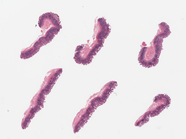

In [ ]:
wsi = open_wsi(slide)
wsi

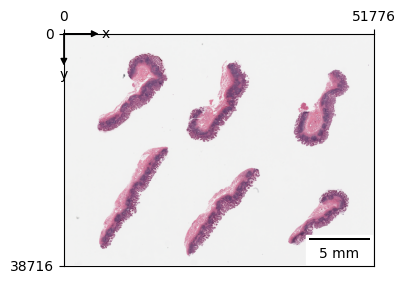

In [ ]:
zs.pl.tissue(wsi)

In [ ]:
zs.pp.find_tissues(wsi)
zs.pp.tile_tissues(wsi, 128)

In [ ]:
zs.tl.feature_extraction(wsi, "plip")

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/568 [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

Output()

In [ ]:
zs.tl.feature_aggregation(wsi, feature_key="plip")

In [ ]:
adata = wsi.fetch.features_anndata("plip")

In [ ]:
wsi = zs.datasets.gtex_small_intestine()

GTEX-11DXX-1626.svs:   0%|          | 0.00/341M [00:00<?, ?B/s]

GTEX-11DXX-1626.zarr.zip:   0%|          | 0.00/42.6M [00:00<?, ?B/s]

version mismatch: detected: RasterFormatV02, requested: FormatV04


/home/runner/work/lazyslide-tutorials/lazyslide-tutorials/.venv/lib/python3.12/site-packages/zarr/creation.py:610: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)


WSI: /home/runner/.cache/huggingface/hub/datasets--RendeiroLab--LazySlide-data/snapshots/7f3d6cdc6a2dab43ff6ca2b3963f1353db133c30/GTEX-11DXX-1626.svs
Reader: openslide
Dimensions: 38717×51791 (h×w), 3 Pyramids
Pixel physical size: 0.4942 MPP
SpatialData object, with associated Zarr store: /home/runner/.cache/huggingface/hub/datasets--RendeiroLab--LazySlide-data/snapshots/7f3d6cdc6a2dab43ff6ca2b3963f1353db133c30/GTEX-11DXX-1626.zarr
├── Images
│     └── 'wsi_thumbnail': DataArray[cyx] (3, 1118, 1495)
├── Shapes
│     ├── 'tiles': GeoDataFrame shape: (19038, 3) (2D shapes)
│     └── 'tissues': GeoDataFrame shape: (6, 2) (2D shapes)
└── Tables
      ├── 'plip_tiles': AnnData (19038, 512)
      └── 'plip_tiles_text_similarity': AnnData (19038, 4)
with coordinate systems:
    ▸ 'global', with elements:
        wsi_thumbnail (Images), tiles (Shapes), tissues (Shapes)
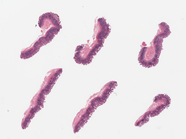

In [ ]:
wsi

In [ ]:
import scanpy as sc

adata = wsi["plip_tiles"]
sc.pp.scale(adata)
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata, flavor="igraph", resolution=0.2)

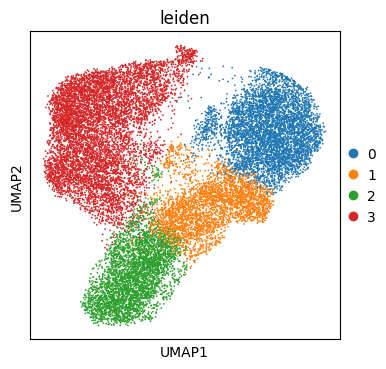

In [ ]:
sc.pl.umap(adata, color="leiden")

In [ ]:
sc.tl.rank_genes_groups(adata, groupby="leiden")

features = set()
for i in adata.obs["leiden"].unique():
    names = sc.get.rank_genes_groups_df(adata, i).names
    features.update(list(names[0:10]) + list(names[-10:]))
features = list(features)

/home/runner/work/lazyslide-tutorials/lazyslide-tutorials/.venv/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:482: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/home/runner/work/lazyslide-tutorials/lazyslide-tutorials/.venv/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:482: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/home/runner/work/lazyslide-tutorials/lazyslide-tutorials/.venv/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:482: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/home/runner/work/lazyslide-tutorials/lazyslide-tutorials/.venv/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:482: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(


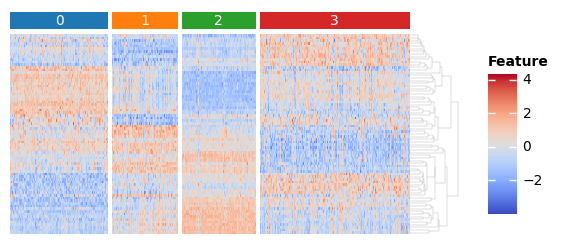

In [ ]:
import marsilea as ma
import marsilea.plotter as mp
from scipy.stats import zscore

key = "leiden"
h = ma.Heatmap(zscore(adata[:, features].X.T), height=2, width=4, label="Feature")
order = sorted(adata.obs[key].unique())
h.group_cols(adata.obs[key], order=order)
h.add_top(mp.Chunk(order, fill_colors=adata.uns[f"{key}_colors"], padding=2), pad=0.05)
h.add_dendrogram("right", method="average", linewidth=0.1)
h.add_legends()
h.render()

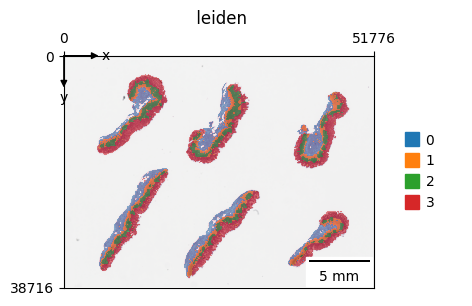

In [ ]:
zs.pl.tiles(
    wsi,
    feature_key="plip",
    color="leiden",
    alpha=0.5,
    palette=adata.uns[f"{key}_colors"],
    show_contours=False,
)

In [ ]:
zs.tl.spatial_domain(wsi, feature_key="plip", resolution=0.2)

In [ ]:
wsi.write()

In [ ]:
zs.pp.tile_graph(wsi)
zs.tl.spatial_features(wsi, "plip")

In [ ]:
zs.tl.spatial_domain(wsi, layer="spatial_features", feature_key="plip", resolution=0.2)

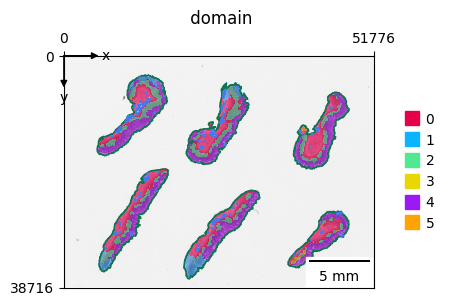

In [ ]:
zs.pl.tiles(wsi, color="domain", alpha=0.5)

In [ ]:
terms = ["mucosa", "submucosa", "musclaris", "lymphocyte"]

In [ ]:
embeddings = zs.tl.text_embedding(terms, model="plip")
zs.tl.text_image_similarity(wsi, embeddings, model="plip", softmax=True)

/home/runner/work/lazyslide-tutorials/lazyslide-tutorials/.venv/lib/python3.12/site-packages/spatialdata/_core/_elements.py:125: UserWarning: Key `plip_tiles_text_similarity` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)


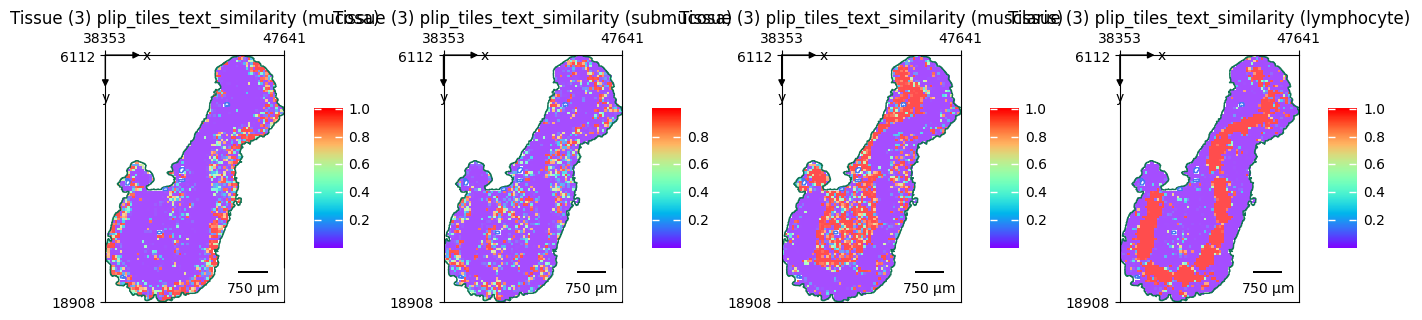

In [ ]:
zs.pl.tiles(
    wsi,
    feature_key="plip_tiles_text_similarity",
    color=terms,
    cmap="rainbow",
    show_image=False,
    tissue_id=3,
    alpha=0.7,
)